<a href="https://colab.research.google.com/github/VeluruMonicagithub/INFOSYS_VIRTUAL_INTERNSHIP/blob/main/Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-331654970.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load("videoaudio.mp4")
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


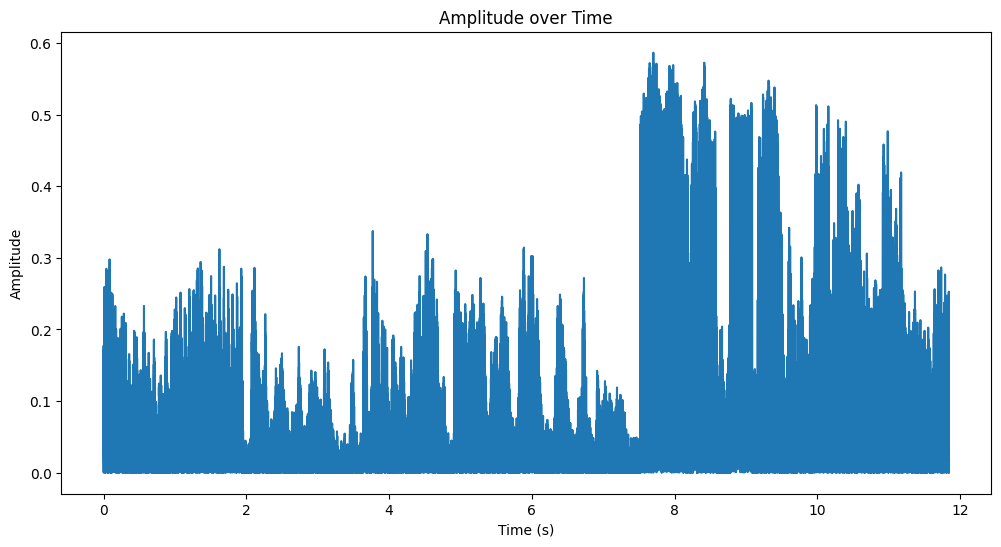

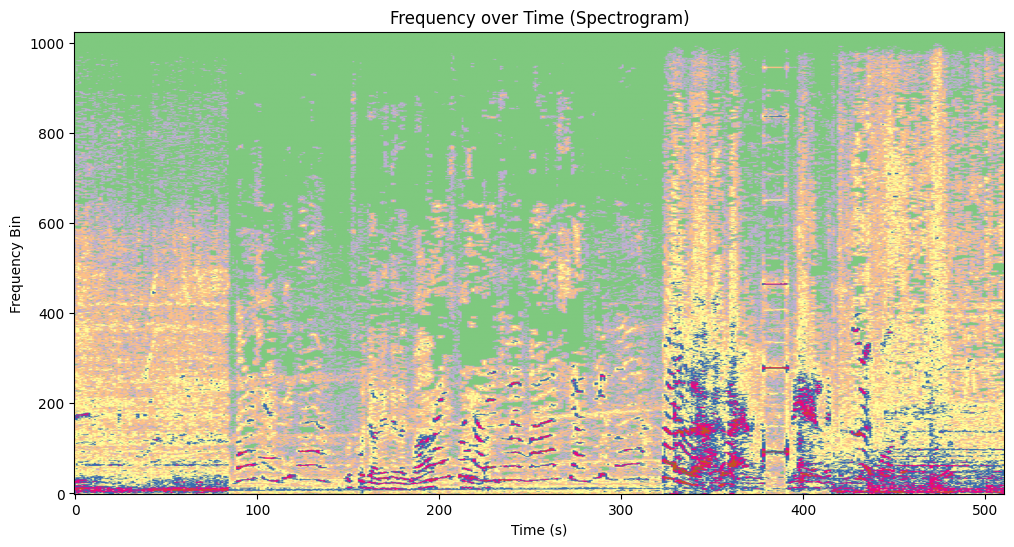

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Load the audio track from the video file
# librosa.load() automatically extracts the audio stream and
# converts it to a time-domain waveform with a target sample rate.
# ------------------------------------------------------------
audio, sr = librosa.load("videoaudio.mp4")

# ------------------------------------------------------------
# Compute amplitude envelope of the audio signal by taking
# absolute values of the waveform. This captures loudness patterns.
# ------------------------------------------------------------
amplitude = np.abs(audio)

# ------------------------------------------------------------
# STFT (Short-Time Fourier Transform) to extract frequency content.
# n_fft: size of FFT window
# hop_length: stride between windows
# stft matrix shape: (frequency_bins, time_frames)
# ------------------------------------------------------------
n_fft = 2048
hop_length = 512

stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

# Compute mean amplitude across time for each frequency bin (optional)
freqs = np.mean(stft, axis=1)

# Convert frame indices to actual timestamps in seconds
times = librosa.frames_to_time(
    np.arange(stft.shape[1]), sr=sr, hop_length=hop_length
)

# ------------------------------------------------------------
# Plot amplitude-vs-time. Useful for detecting loud segments,
# silence regions, or envelope patterns.
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(audio)) / sr, amplitude)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Amplitude over Time")
plt.show()

# ------------------------------------------------------------
# Plot spectrogram: frequency content over time.
# librosa.amplitude_to_db converts raw amplitudes to decibels
# for better interpretability.
# cmap='Accent' is only visual styling.
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
plt.imshow(
    librosa.amplitude_to_db(stft, ref=np.max),
    cmap="Accent",
    origin="lower",
    aspect="auto"
)
plt.xlabel("Time (s)")
plt.ylabel("Frequency Bin")
plt.title("Frequency over Time (Spectrogram)")
plt.show()